# Link to Drive, Set File Paths

In [61]:
import os
base_directory = os.getcwd() # store your base directory for easy reference
assignment_two_data = base_directory + '/Homework_Two_Data/'

In [62]:
# Load core libraries and utilities
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from skimage import io

# Jupyter notebook "magic"
%matplotlib inline

# Helper Functions

In [63]:
# We need a tool that converts images into grayscale (i.e. all pixel values in [0, 1])
def gray_scale_convert(image):
    rescaled_image = np.zeros((image.shape[0], image.shape[1]))
    rescaled_image[:, :] = image
    rescaled_image -= np.min(rescaled_image)
    rescaled_image /= np.max(rescaled_image)
    return rescaled_image

In [64]:
# We need to be able to pass in a directory and build an image list
def file_builder(directory):
    image_list = []
    # iterate over files in
    # that directory
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename != "Readme":
                input_matrix = io.imread(os.path.join(root, filename))
                squeeze_matrix = np.squeeze(input_matrix)
                input_image = gray_scale_convert(squeeze_matrix)
                image_list.append( input_image )
    return image_list

# Problem Set

In [65]:
# Build image lists for cropped and uncropped images
cropped_directory = assignment_two_data + '/CroppedYale/'
uncropped_directory = assignment_two_data + '/yalefaces_uncropped/'

cropped_image_list = file_builder(cropped_directory)
uncropped_image_list = file_builder(uncropped_directory)

So, using the code so far, you have built lists of grayscale matrices which encode a variety of images.  Now we want to "learn" from these images using the SVD.  

**Problem 1**: Following the model below, build a matrix from the uncropped images each of whose columns is a flattened grayscale image.  

In [76]:
# Problem 1 Model
num_crp_images = len(cropped_image_list)
crp_row, crp_col = np.shape(cropped_image_list[0])
crp_image_mat = np.zeros((crp_row*crp_col, num_crp_images), dtype=np.float64)
for cnt, image in enumerate(cropped_image_list):
    crp_image_mat[:, cnt] = image.flatten()

In [77]:
# Problem 1 answer goes here.
num_uncrp_images = len(uncropped_image_list)
uncrp_row, uncrp_col = np.shape(uncropped_image_list[0])
uncrp_img_mtx = np.zeros((uncrp_row * uncrp_col, num_uncrp_images), dtype=np.float64)
for cnt, image in enumerate(uncropped_image_list):
    uncrp_img_mtx[:, cnt] = image.flatten()

**Problem 2**: Following the discussion in lecture, take out the mean/average of the columns in each image matrix. Note, you'll need to look up how to use `np.mean()`  and `np.tile()` to make this efficient.  

In [ ]:
crp_avg = np.mean(crp_image_mat, axis=1)
# Note, to turn crp_avg into a column vector use: crp_avg.reshape(-1, 1)
crp_image_mat -= np.tile(crp_avg.reshape(-1,1), (1, num_crp_images))

uncrp_avg = np.mean(uncrp_img_mtx, axis=1)
uncrp_img_mtx -= np.tile(uncrp_avg.reshape(-1,1), (1, num_uncrp_images))

**Problem 3**: Using `.reshape()`, plot the average face for both the cropped and uncropped images.  

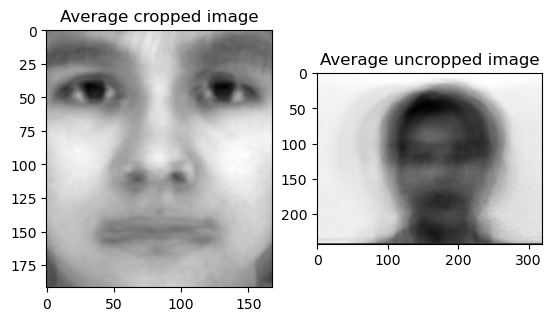

In [ ]:
# Problem 3 code goes here.
avg_crp_face = crp_avg.reshape(crp_row, crp_col)
avg_uncrp_face = uncrp_avg.reshape(uncrp_row, uncrp_col)

plt.subplot(121)
plt.imshow(avg_crp_face, cmap='gray')
plt.title('Average cropped image')

plt.subplot(122)
plt.imshow(avg_uncrp_face, cmap='gray')
plt.title('Average uncropped image')

#plt.savefig("avg_face.png", dpi=300, bbox_inches='tight')

**Problem 4**: For both the zero-average cropped and uncropped image matrices, find the SVD of each, rescale and take log plots of the singular values, and then characterize what percentage of values are within 1/10, 1/100, and 1/1000 of the size of the largest singular value.   

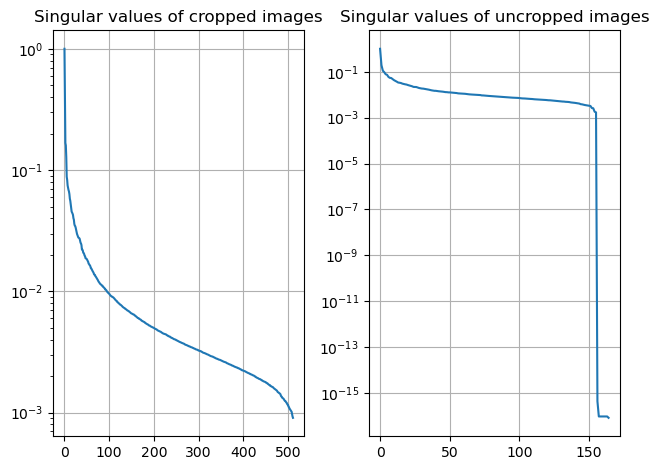

In [ ]:
u_crp, s_crp, vh_crp = np.linalg.svd(crp_image_mat, full_matrices=False)
# Problem 4 code goes here
u_uncrp, s_uncrp, vh_uncrp = np.linalg.svd(uncrp_img_mtx, full_matrices=False)

s_max_crp = np.max(s_crp)
s_max_uncrp = np.max(s_uncrp)
s_crp_normalized = s_crp.flatten() / s_max_crp
s_uncrp_normalized = s_uncrp.flatten() / s_max_uncrp

plt.subplot(121)
plt.semilogy(s_crp_normalized)
plt.title('Singular values of cropped images')
plt.grid()

plt.subplot(122)
plt.semilogy(s_uncrp_normalized)
plt.title('Singular values of uncropped images')
plt.grid()

plt.tight_layout()

#plt.savefig("singular_values.png", dpi=300, bbox_inches='tight')

In [147]:
thresholds = np.array([0.1, 0.01, 0.001])

frac_crp = ((s_crp_normalized[:, None] >= thresholds).sum(axis=0) / len(s_crp_normalized)) * 100
frac_uncrp = ((s_uncrp_normalized[:, None] >= thresholds).sum(axis=0) / len(s_uncrp_normalized)) * 100

print((s_crp_normalized[:, None] >= 0.05).sum(axis=0))
print((s_uncrp_normalized[:, None] >= 0.05).sum(axis=0))

for j, t in enumerate(thresholds):
    print(f"Threshold {t}: Cropped = {frac_crp[j]:.2f}%, Uncropped = {frac_uncrp[j]:.2f}%")

[15]
[9]
Threshold 0.1: Cropped = 0.98%, Uncropped = 1.82%
Threshold 0.01: Cropped = 18.55%, Uncropped = 41.21%
Threshold 0.001: Cropped = 99.41%, Uncropped = 94.55%


Now, how can we start to analyze our image collections using the SVD/PCA?  We're going to take a more naive approach than the book does to answer this.  First, plot the first three columns of `u_crp` as images in grayscale.  Explain what you are finding.  

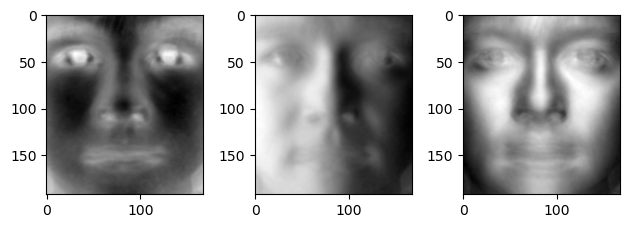

In [ ]:
# Problem 4 code goes here 
plt.subplot(131); plt.imshow(u_crp[:,0].reshape(crp_row, crp_col), cmap='gray')
plt.subplot(132); plt.imshow(u_crp[:,1].reshape(crp_row, crp_col), cmap='gray')
plt.subplot(133); plt.imshow(u_crp[:,2].reshape(crp_row, crp_col), cmap='gray')
plt.tight_layout()
#plt.savefig("first3modes.png", dpi=300, bbox_inches='tight')

Next, let's see how the various projections look across all of the images.

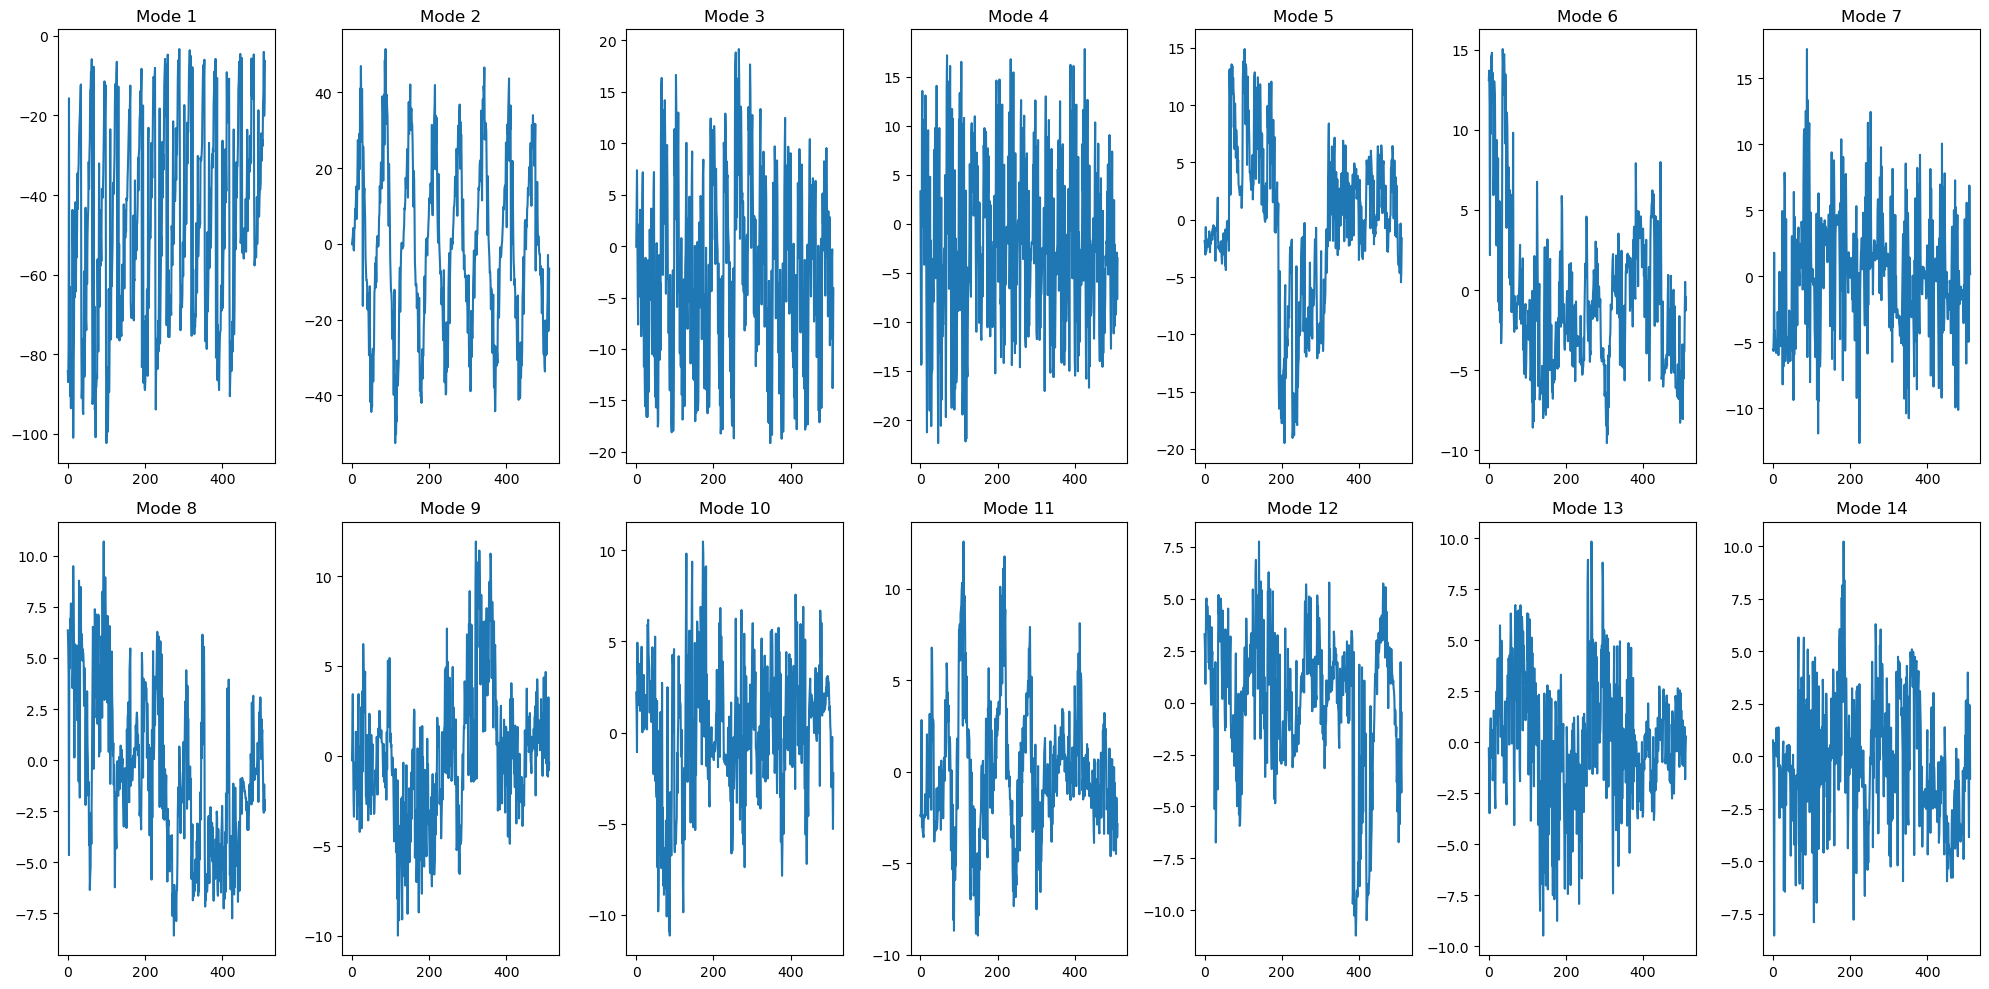

In [ ]:
num_modes = 14 # why did I choose 14 here?
pca_proj_crp = u_crp[:, :num_modes].T @ crp_image_mat

fig, axes = plt.subplots(2, 7, figsize=(20, 10))
ax = axes.ravel()
for jj in range(num_modes):
    ax[jj].plot(pca_proj_crp[jj, :])
    ax[jj].set_title(f"Mode {jj+1}")
plt.tight_layout()
#plt.savefig("mode14.png", dpi=300, bbox_inches='tight')

So since we're trying to take a stab at "clustering" our data, we might also want to look at the same plots but now as histograms.  

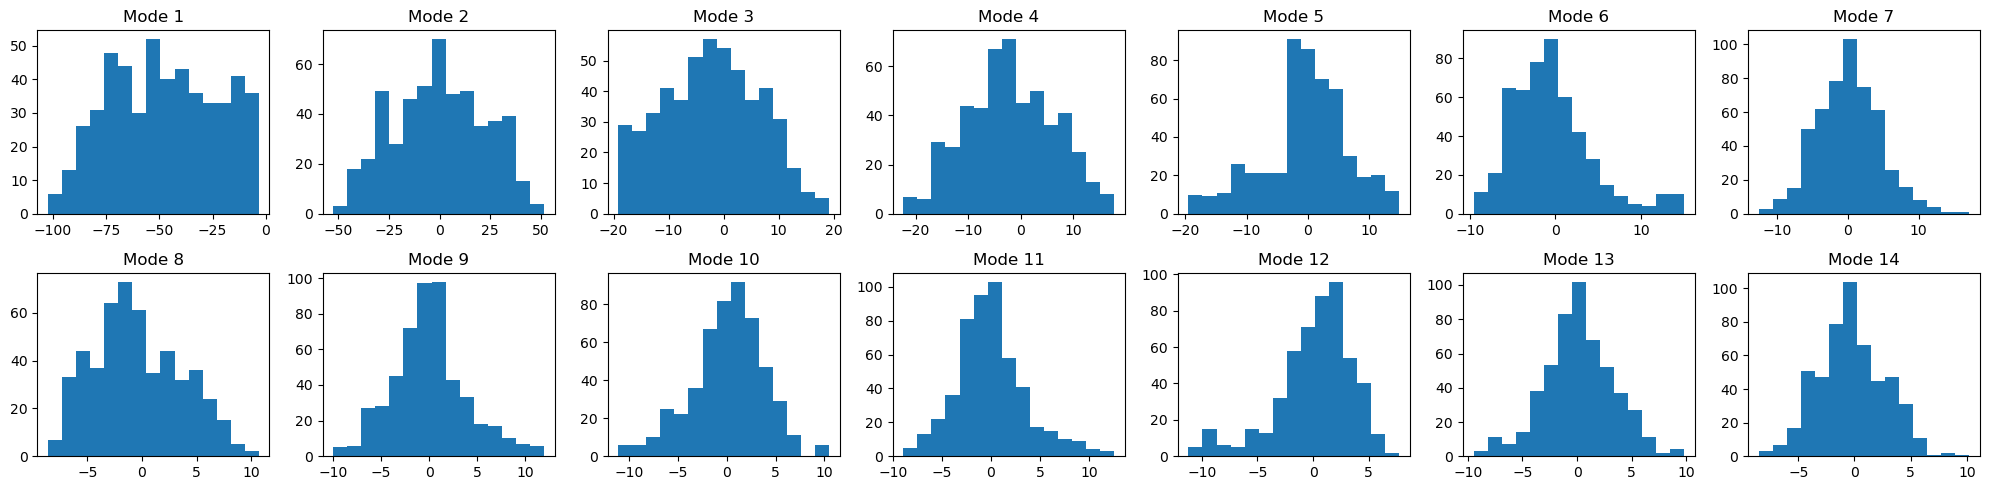

In [ ]:
fig, axes = plt.subplots(2, 7, figsize=(20, 5))
ax = axes.ravel()
num_bins = 15
for jj in range(num_modes):
  ax[jj].hist(pca_proj_crp[jj, :], bins=num_bins)
  ax[jj].set_title(f"Mode {jj+1}")
plt.tight_layout()

#plt.savefig("mode14hist.png", dpi=300, bbox_inches='tight')

**Problem 5** From the mode plots above, which modes do you think are the most meaningful?  To help you answer this, think about which plots might help you label images.  To do this, you need strong contrasts in the plots.  For example, how would you compare Mode 3 to Mode 13?  Which gives you more insight into underlying features of the image dataset?

**Problem 6** (Graduate/Extra Credit): The above is for cropped images.  Plot equivalent results for the uncropped images.  

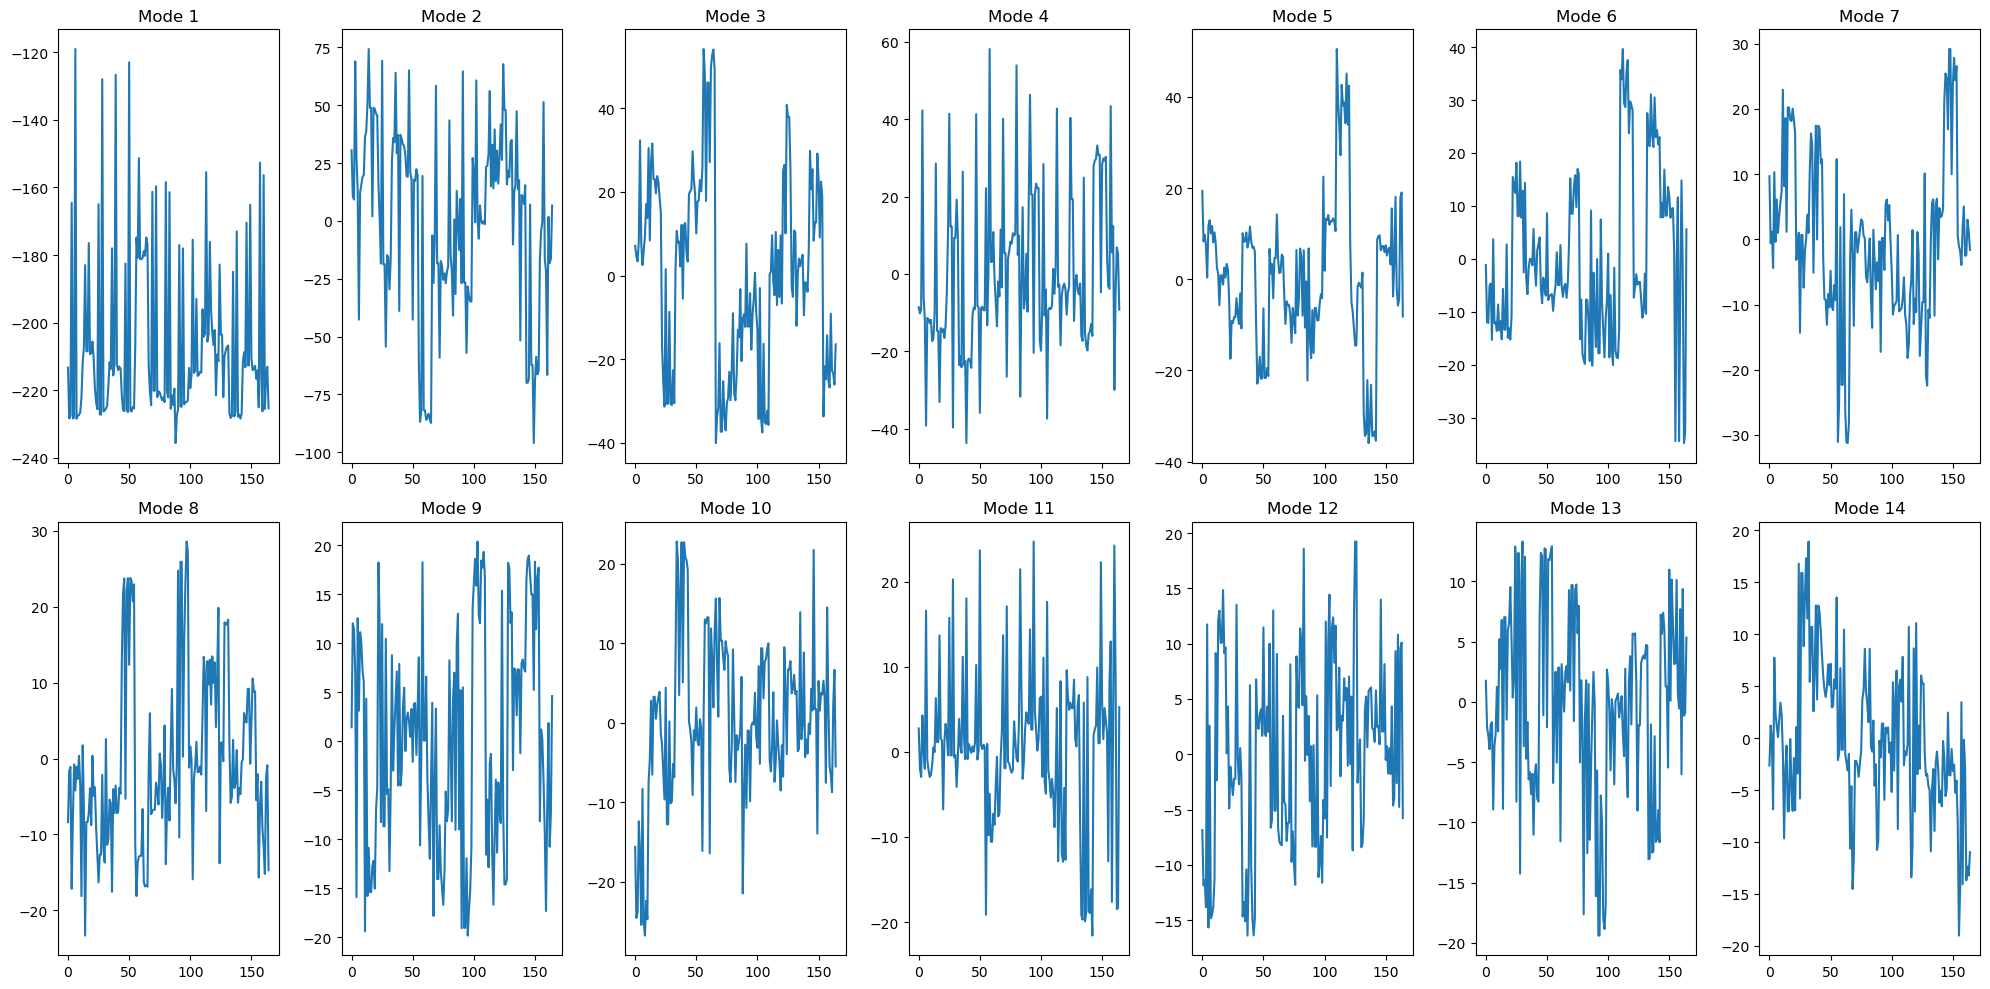

In [ ]:
num_modes = 14
pca_proj_uncrp = u_uncrp[:, :num_modes].T @ uncrp_img_mtx

fig, axes = plt.subplots(2, 7, figsize=(20, 10))
ax = axes.ravel()
for jj in range(num_modes):
    ax[jj].plot(pca_proj_uncrp[jj, :])
    ax[jj].set_title(f"Mode {jj+1}")
plt.tight_layout()

#plt.savefig("uncrp_mode14.png", dpi=300, bbox_inches='tight')

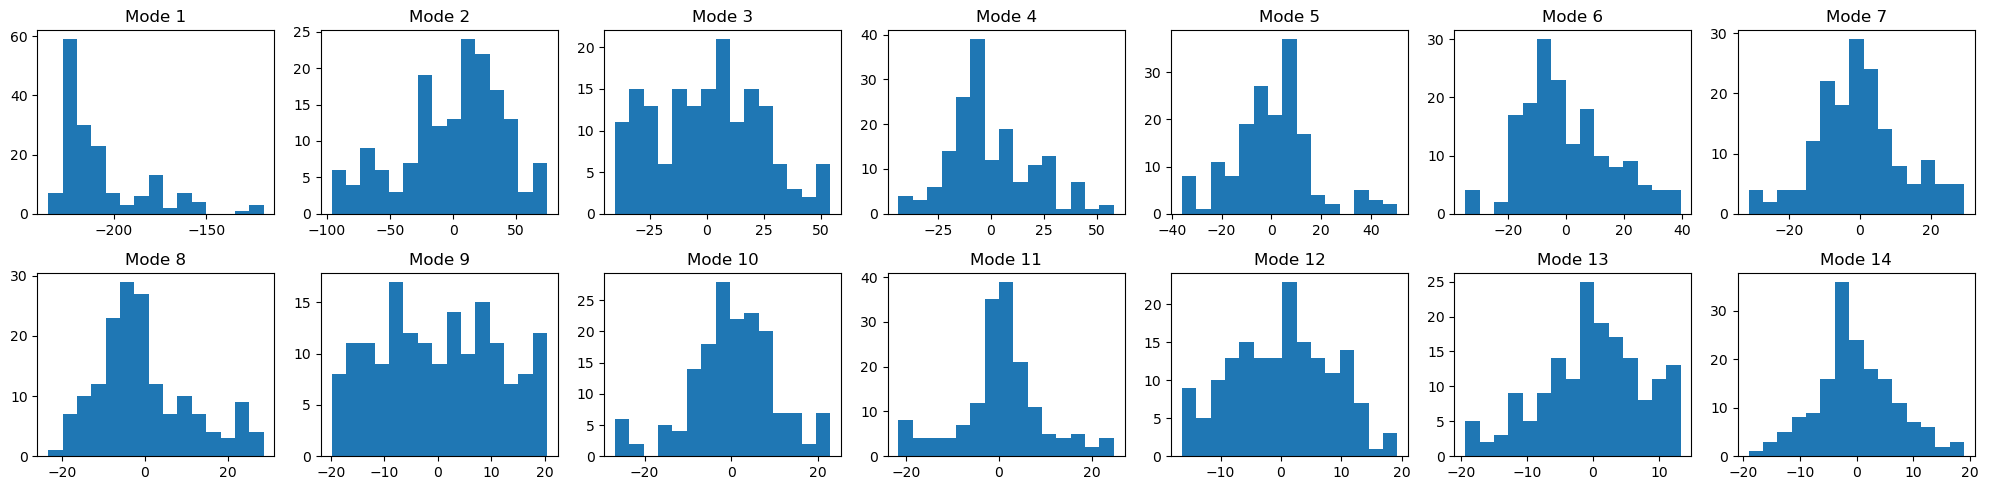

In [ ]:
fig, axes = plt.subplots(2, 7, figsize=(20, 5))
ax = axes.ravel()
num_bins = 15
for jj in range(num_modes):
  ax[jj].hist(pca_proj_uncrp[jj, :], bins=num_bins)
  ax[jj].set_title(f"Mode {jj+1}")
plt.tight_layout()

#plt.savefig("uncrp_mode14hist.png", dpi=300, bbox_inches='tight')

**Problem 7**: Now, for the cropped image set, choose the 3 most interesting modes and plot them against one another using the code below.  What else can you infer by looking at this plot?  Note, you might want to try a few different choices here.  Maybe even plot some 'bad' choices just so you have some points of comparison here.  

In [ ]:
comb_list = [[, , ], [, , ]] # add your particular choices here

fig = plt.figure(figsize=(10, 5))
for jj in range(len(comb_list)):
  x = pca_proj_crp[comb_list[jj][0], :]
  y = pca_proj_crp[comb_list[jj][1], :]
  z = pca_proj_crp[comb_list[jj][2], :]
  ax = fig.add_subplot(1, len(comb_list), jj+1, projection='3d') # you might need to adjust this depending on how many images you want to plot at once
  ax.scatter(x, y, z, s=2.)
  ax.set_title(f"Modes: ({comb_list[jj][0]}, {comb_list[jj][1]}, {comb_list[jj][2]})")

plt.tight_layout()

**Problem 8** (Graduate/Extra Credit): Repeat the above analysis for the uncropped image set.  What differences do you see relative to the cropped image set?  How might you explain that?  